In [1]:
import numpy as np
import pandas as pd
from dowker_homology import dowker_persistent_homology, plot_persistence
%matplotlib notebook

In [2]:
# import data
df = pd.read_csv("data/dt.txt", skiprows = 1, names=["x", "y", "z"], sep = " ")
coords = df.values

In [3]:
# choose parameters
n = len(df)
interleaving = 3
dimension = 2

In [4]:
%%time 
homology_dowker, cover_radius_dowker, max_filtration_value_dowker = dowker_persistent_homology(
    coords, 
    n_samples=n, 
    interleaving=interleaving,
    dimension=dimension, 
    method="dowker",
    verbose=True)

Unreduced nerve has cardinality 85654918688430.0
Clique reduced nerve of cover has cardinality 12132448
Sparse nerve of cover has cardinality 1258781
CPU times: user 16min 28s, sys: 14.8 s, total: 16min 43s
Wall time: 16min 48s


In [5]:
%%time 
homology_sheehy, cover_radius_sheehy, max_filtration_value_sheehy = dowker_persistent_homology(
    coords, 
    n_samples=n, 
    interleaving=interleaving,
    dimension=dimension, 
    method="sheehy",
    verbose=True)

Unreduced nerve has cardinality 85654918688430.0
Clique reduced nerve of cover has cardinality 19818293
Sparse nerve of cover has cardinality 1284821
CPU times: user 29min 29s, sys: 22.5 s, total: 29min 52s
Wall time: 29min 52s


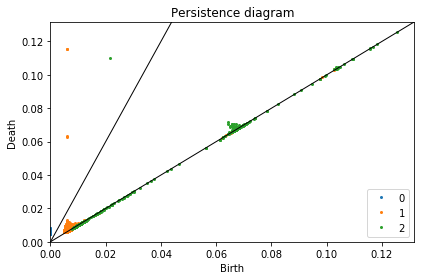

In [6]:
plot_dowker = plot_persistence(homology_dowker,
                               ticks=None, 
                               interleaving=interleaving,
                               cover_radius=cover_radius_dowker,
                               max_filtration_value=max_filtration_value_dowker,
                               s=10)

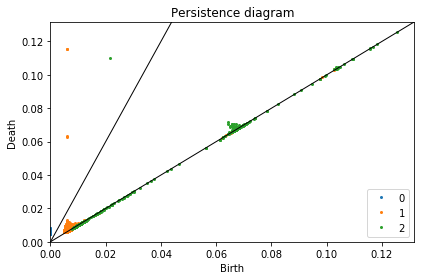

In [7]:
plot_sheehy = plot_persistence(homology_sheehy,
                               ticks=None, 
                               interleaving=interleaving,
                               cover_radius=cover_radius_sheehy,
                               max_filtration_value=max_filtration_value_sheehy,
                               s=10)

In [8]:
np.all(homology_dowker == homology_sheehy)

True